<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#magnitude-Spectrum" data-toc-modified-id="magnitude-Spectrum-1">magnitude Spectrum</a></span></li><li><span><a href="#Guassian-Filter" data-toc-modified-id="Guassian-Filter-2">Guassian Filter</a></span></li><li><span><a href="#Laplacian-Filter" data-toc-modified-id="Laplacian-Filter-3">Laplacian Filter</a></span></li><li><span><a href="#Low-Pass-Ideal-Filter" data-toc-modified-id="Low-Pass-Ideal-Filter-4">Low Pass Ideal Filter</a></span></li><li><span><a href="#High-Pass-Ideal-Filter" data-toc-modified-id="High-Pass-Ideal-Filter-5">High Pass Ideal Filter</a></span></li><li><span><a href="#Low-Pass-Butterworth-Filter" data-toc-modified-id="Low-Pass-Butterworth-Filter-6">Low Pass Butterworth Filter</a></span></li><li><span><a href="#High-Pass-Butterworth-Filter" data-toc-modified-id="High-Pass-Butterworth-Filter-7">High Pass Butterworth Filter</a></span></li></ul></div>

In [1]:
import cv2
import numpy as np
from numpy.fft import fft2,fftshift,ifft2,ifftshift
from matplotlib import pyplot as plt

In [2]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

# magnitude Spectrum


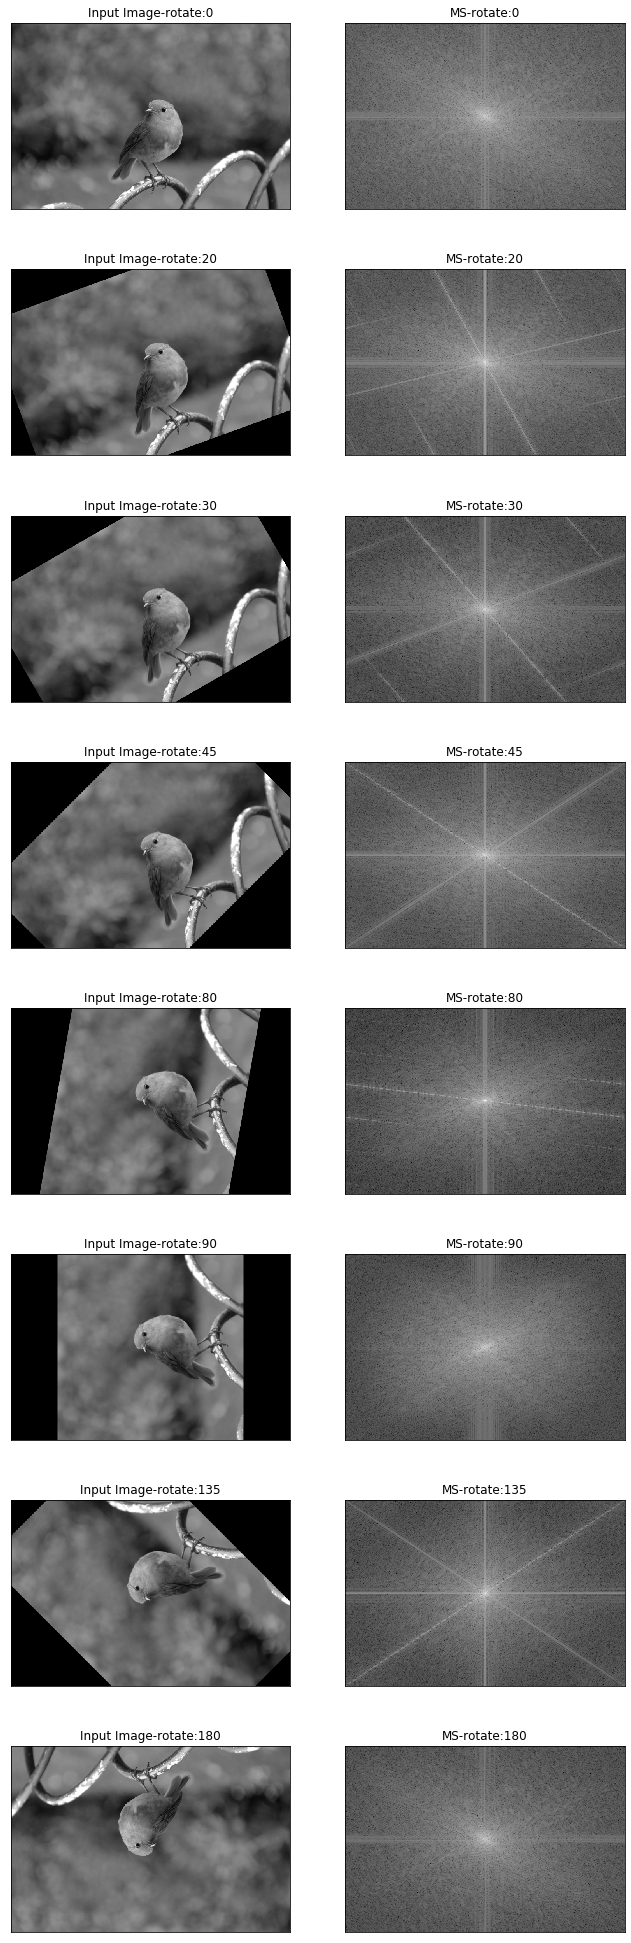

In [3]:
img = cv2.imread('sample.jpg',0)
angles=[0,20,30,45,80,90,135,180]

plt.figure(figsize=(11,len(angles)*5))

for index,angle in enumerate(angles):
    rotatedImg = rotate_image(img,angle)
    magnitudeSpectrum_rotatedImg = 20*np.log(
                                  np.abs(
                                  np.fft.fftshift(
                                  np.fft.fft2(
                                      rotatedImg))))
    plt.subplot(len(angles)+1,2,index*2+1)
    plt.imshow(rotatedImg, cmap = 'gray')
    plt.title(f'Input Image-rotate:{angle}')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(len(angles)+1,2,index*2+2)
    plt.imshow(magnitudeSpectrum_rotatedImg, cmap = 'gray')
    plt.title(f'MS-rotate:{angle}')
    plt.xticks([])
    plt.yticks([])

# Guassian Filter

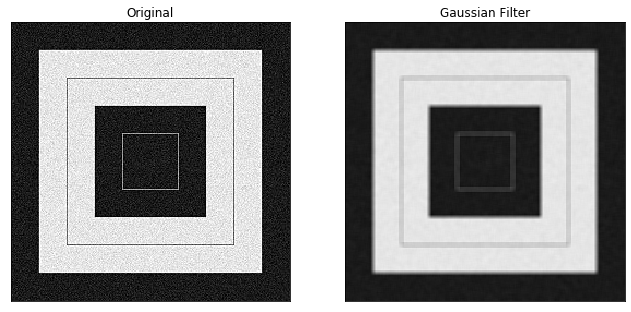

In [4]:
gaussianNoiseImage=cv2.imread("gaussianNoise.jpg")
kernelSize=5
guassinaFilterdImage = cv2.GaussianBlur(gaussianNoiseImage, (kernelSize, kernelSize),cv2.BORDER_DEFAULT)
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(gaussianNoiseImage, cmap='gray'),plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(guassinaFilterdImage, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([])
plt.yticks([])
plt.show()


the Gaussian kernel is linearly separable. This means we can break any 2-d filter into two 1-d filters. Because of this, the computational complexity is reduced from $O(n^2)$ to $O(n)$. Let’s see an example
$$
\frac{1}{16}\begin{pmatrix}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{pmatrix} =\frac{1}{16}\begin{pmatrix}
1 & 2 & 1
\end{pmatrix}\begin{pmatrix}
1\\
2\\
1
\end{pmatrix}
$$


The Gaussian kernel weights(1-D) can be obtained quickly using the Pascal’s Triangle. See how the third row corresponds to the $3×3$ filter we used above.
```
1
1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
```

this code block will return the used kernel in gaussian filter, (change varable `kernelSize` for differnt kernel sizes)

In [5]:
from IPython.display import display, Markdown
# calculating guassian kernel
kernelSize=7
assert kernelSize%2==1, ValueError(f"The kernelSize must be odd, {kernelSize} is even")
kernel_1D=cv2.getGaussianKernel(kernelSize,-1)
kernel_2D=kernel_1D.dot(kernel_1D.T)
powerOfCoeficient=np.log2(kernel_2D[0,0])
kernel_2D=np.int32(kernel_2D*2**int(-powerOfCoeficient))
kernel_1D=np.int32(kernel_1D*2**int(-powerOfCoeficient))
kernel_2D_latex="\\\\\n".join(" & ".join(str(i) for i in line) for line in kernel_2D)
kernel_1D_latexVertical="\\\\\n".join(str(i[0]) for i in kernel_1D)
kernel_1D_latexHorizontal=" & ".join(str(i[0]) for i in kernel_1D)
display(Markdown(rf"""$$
\frac{1}{({2**int(-powerOfCoeficient)})}\begin{'{pmatrix}'}
{kernel_2D_latex}
\end{'{pmatrix}'} =\frac{1}{({2**int(-powerOfCoeficient)})}\begin{'{pmatrix}'}
{kernel_1D_latexHorizontal}
\end{'{pmatrix}'}\begin{'{pmatrix}'}
{kernel_1D_latexVertical}
\end{'{pmatrix}'}
$$"""))

$$
\frac1{1024}\begin{pmatrix}
1 & 3 & 7 & 9 & 7 & 3 & 1\\
3 & 12 & 24 & 31 & 24 & 12 & 3\\
7 & 24 & 49 & 63 & 49 & 24 & 7\\
9 & 31 & 63 & 81 & 63 & 31 & 9\\
7 & 24 & 49 & 63 & 49 & 24 & 7\\
3 & 12 & 24 & 31 & 24 & 12 & 3\\
1 & 3 & 7 & 9 & 7 & 3 & 1
\end{pmatrix} =\frac1{1024}\begin{pmatrix}
32 & 112 & 224 & 288 & 224 & 112 & 32
\end{pmatrix}\begin{pmatrix}
32\\
112\\
224\\
288\\
224\\
112\\
32
\end{pmatrix}
$$

# Laplacian Filter
Since laplacian filter is upper bound filter, the input image should not have any noises. Thats why we use the output from guassian filter.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


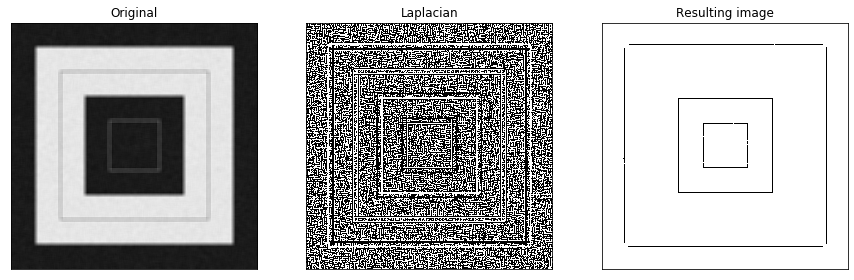

In [6]:
laplacianImg = cv2.Laplacian(guassinaFilterdImage,cv2.CV_64F)
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.imshow(guassinaFilterdImage, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(laplacianImg, cmap='gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(guassinaFilterdImage - laplacianImg, cmap='gray')
plt.title('Resulting image')
plt.xticks([])
plt.yticks([])
plt.show()

# Low Pass Ideal Filter

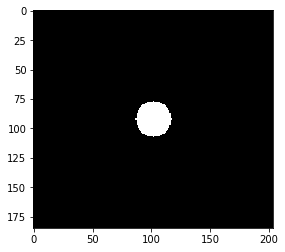

In [7]:
def idealFilter(img,D0,lowpass=True):
    row,col=img.shape
    rowsIndex=np.repeat(np.arange(row).reshape((row,1)),col,axis=1)
    colsIndex=np.repeat(np.arange(col).reshape((col,1)),row,axis=1).T
    D=np.sqrt((rowsIndex-row//2)**2+(colsIndex-col//2)**2)
    if lowpass:
        H=np.heaviside(-1*(D-D0),1)
    else:
        H=np.heaviside(1*(D-D0),1)
    return H

def putFilter(img,H):
    row,col=img.shape
    c=np.array([[1,0]*(max(row,col)//2+1)])*2-1
    c=c.T.dot(c)[:row,:col]
    return np.real(
                ifftshift(
                    ifft2(
                        fft2(
                            fftshift(img*c)
                        )
                        *H
                    )
                )*c
            )
    return np.real(ifft2(ifftshift(fftshift(fft2(img))*H)))
img=cv2.imread("testPic.png",0)
plt.imshow(idealFilter(img,15),cmap='gray')

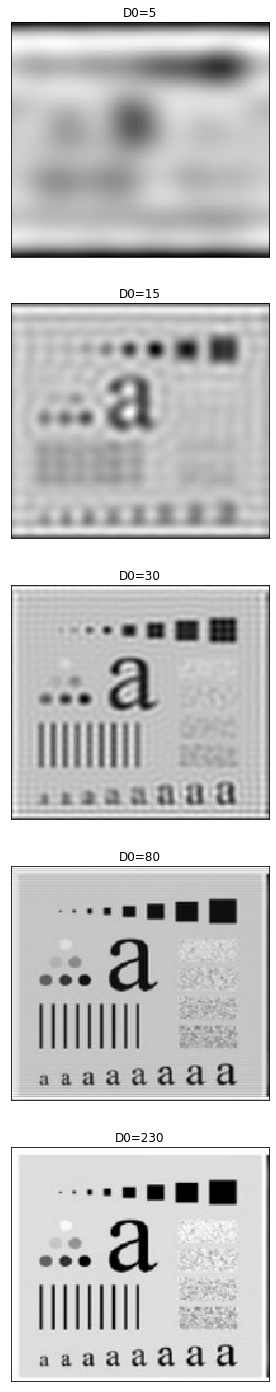

In [8]:

img=cv2.imread("testPic.png",0)
testCases=[5,15,30,80,230]
plt.figure(figsize=(6,len(testCases)*5))
for index,D0 in enumerate(testCases):
    H=idealFilter(img,D0)
    idealFilteredImg=putFilter(img,H)
    plt.subplot(len(testCases),1,index+1)
    plt.title(f'D0={D0}')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(idealFilteredImg,cmap='gray')

# High Pass Ideal Filter

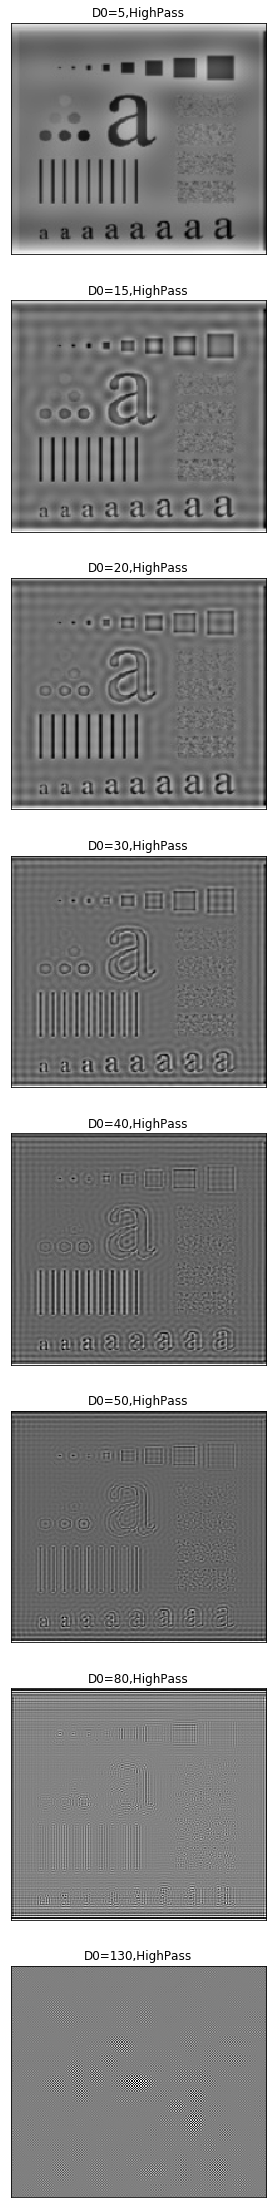

In [9]:
testCases=[5,15,20,30,40,50,80,130]
plt.figure(figsize=(6,len(testCases)*5))
for index,D0 in enumerate(testCases):
    H=idealFilter(img,D0,lowpass=False)
    idealFilteredImg=putFilter(img,H)
    plt.subplot(len(testCases),1,index+1)
    plt.title(f'D0={D0},HighPass')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(idealFilteredImg,cmap='gray')

# Low Pass Butterworth Filter

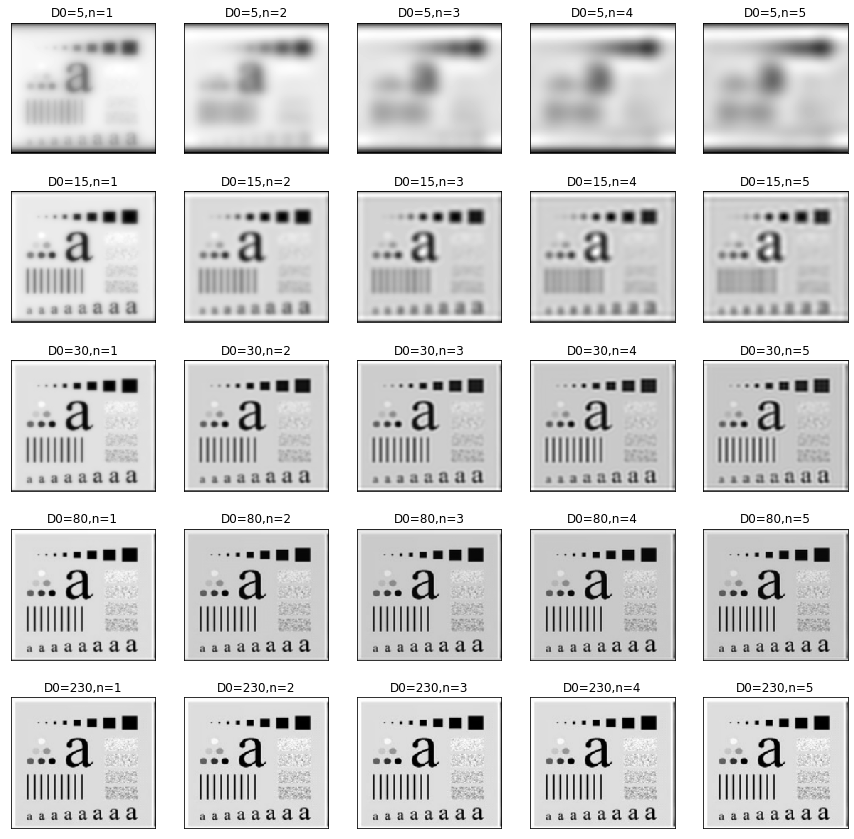

In [10]:
img=cv2.imread("testPic.png",0)
def butterWorthFilter(img,D0,n):
    row,col=img.shape
    rowsIndex=np.repeat(np.arange(row).reshape((row,1)),col,axis=1)
    colsIndex=np.repeat(np.arange(col).reshape((col,1)),row,axis=1).T
    D=np.sqrt((rowsIndex-row//2)**2+(colsIndex-col//2)**2)
    H=1/(1+(D/D0)**(2*n))
    return H

cutOfFrequenci_testCase=[5,15,30,80,230]
order_testCase=[1,2,3,4,5]
plt.figure(figsize=(len(order_testCase)*3,len(cutOfFrequenci_testCase)*3))
for row,D0 in enumerate(cutOfFrequenci_testCase):
    for col,n in enumerate(order_testCase):
        plt.subplot(len(cutOfFrequenci_testCase),
                    len(order_testCase),
                     row*len(order_testCase)+col+1)
        plt.title(f'D0={D0},n={n}')
        plt.xticks([])
        plt.yticks([])
        H=butterWorthFilter(img,D0,n)
        butterWorthImg=putFilter(img,H)
        plt.imshow(butterWorthImg,cmap='gray')


# High Pass Butterworth Filter

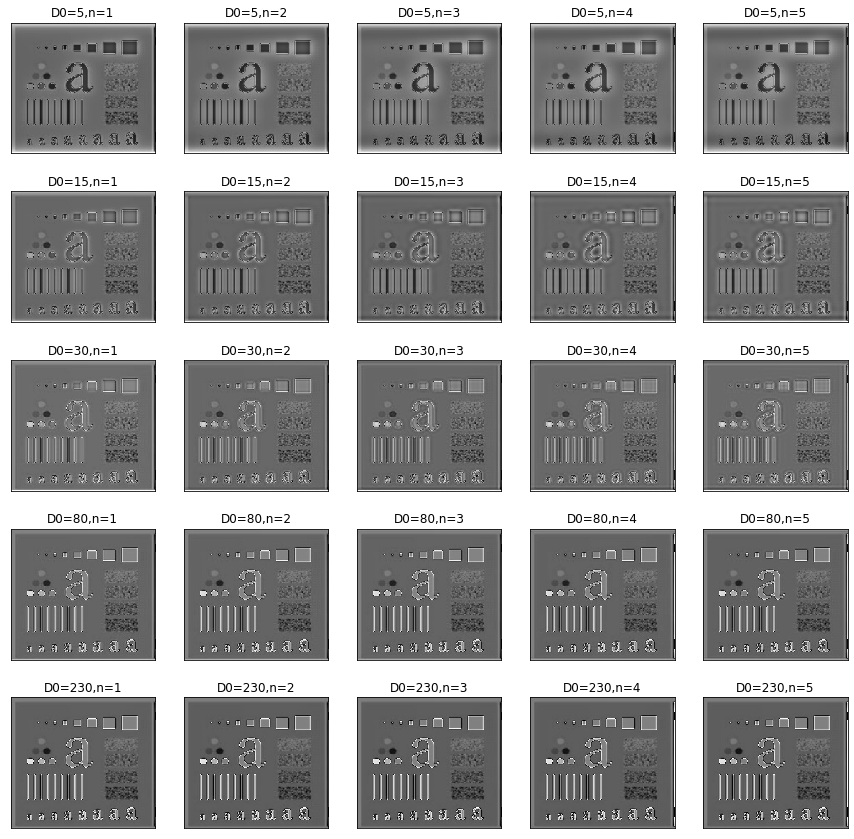

In [11]:
cutOfFrequenci_testCase=[5,15,30,80,230]
order_testCase=[1,2,3,4,5]
plt.figure(figsize=(len(order_testCase)*3,len(cutOfFrequenci_testCase)*3))
for row,D0 in enumerate(cutOfFrequenci_testCase):
    for col,n in enumerate(order_testCase):
        plt.subplot(len(cutOfFrequenci_testCase),
                    len(order_testCase),
                     row*len(order_testCase)+col+1)
        plt.title(f'D0={D0},n={n}')
        plt.xticks([])
        plt.yticks([])
        H=butterWorthFilter(img,D0,n)
        butterWorthImg=putFilter(img,H)
        plt.imshow(2*img-butterWorthImg,cmap='gray')
